TEST:
- Create 2 circle data with center TEST
- Can expand circles out by multiplying by 10?
- does adding duplicate nodes/edges actually add dupes?


In [251]:
import networkx as nx
import os
import json
import matplotlib as plt

In [160]:
G = nx.DiGraph()

data_directory = "./output_friends/"

# Load the people I follow into a list
berts_friends = []
with open(data_directory+"bertwagner.json",encoding = 'utf-8') as f:
        friends=json.loads(f.read())
        berts_friends = [friend["screen_name"] for friend in friends]

# There's something great about Twitter calling people these my friends.  I follow them, but there's no guarantee they actually *like* me.
berts_friends

['sqlatspeed',
 'tehgenerallee',
 'Adedba',
 'SQLDiplomat',
 'SSMSCrashed',
 'HackingDave',
 'fs0c131y',
 'JanMulkens',
 'lbredal',
 'tarah',
 'mipsytipsy',
 'loriedwards',
 'SysAdminDrew',
 'kevchant',
 'ggable313',
 'janecalexander',
 'jimseven',
 'SQLDusty',
 'SaschaDittmann',
 'NickMOrlando',
 'dato_mu',
 'MarkRober',
 'doingbestpod',
 'MMarie',
 'AzureSQL',
 'josh_the_coder',
 'MattMcgiffen',
 'Bill_Lund',
 'sqlagentman',
 'kenjimallon',
 'VickiVanDamme',
 'skamille',
 'betsyweber',
 'SQLDBA',
 '2meterDBA',
 'nathanwpyle',
 'SQLGoddess',
 'SecEvangelism',
 'DekoDBA',
 'JackRhysider',
 'DarknetDiaries',
 'SteveZCantrell',
 'emitch',
 'brad_frost',
 'MicrosoftToDo',
 'blythemorrow',
 'adamneelybass',
 'bpnomad',
 'FreddyRaccoon',
 'code',
 'stirtrek',
 'landrews5807',
 'texasamy',
 'dpless',
 '_akhilm',
 'DBAJoeB',
 'mike_walsh',
 'Pittsburgh_Dad',
 'SQLSocialite',
 'erikdarlingdata',
 'herdcats',
 'CostcoWine',
 'jjrobots',
 'bobek_balinek',
 'SQLServerDBA318',
 'Froggyncm',
 'filt

In [170]:
# Load everyone's friends except mine
for filename in os.listdir(data_directory):
    if (filename != "bertwagner.json"):
        with open(data_directory+filename,encoding = 'utf-8') as f:
            screen_name = filename.replace(".json","")
            friends = json.loads(f.read())
            
            G.add_node(screen_name,is_friend=True)

            # Add all of my friend's friends
            for friend in friends:
                    # If this friend is in Bert's list of friends, assign the is_friend attribute appropriately
                    if friend["screen_name"] in berts_friends:
                        is_friend = True
                    else:
                        is_friend = False
                        
                    G.add_node(friend["screen_name"], is_friend = is_friend)
                    G.add_edge(screen_name,friend["screen_name"])
                

In [215]:
# Find the people with the highest number of edges, filtering out the ones that are already my friends
degrees = [{"screen_name": n[0],  "degrees": list(nx.degree(G,n))[0][1]} for n in nx.get_node_attributes(G,'is_friend').items() if n[1] == False]
sorted_degrees = sorted(degrees, key=lambda k:k["degrees"], reverse=True)

# Get the top 50
top_50 = sorted_degrees[1:50]
top_50

[{'screen_name': 'SQLHA', 'degrees': 165},
 {'screen_name': 'KarlaKay22', 'degrees': 158},
 {'screen_name': 'kleegeek', 'degrees': 156},
 {'screen_name': 'StrateSQL', 'degrees': 154},
 {'screen_name': 'hope_foley', 'degrees': 145},
 {'screen_name': 'SQLvariant', 'degrees': 141},
 {'screen_name': 'Neil_Hambly', 'degrees': 140},
 {'screen_name': '_StaciaV_', 'degrees': 139},
 {'screen_name': 'MladenPrajdic', 'degrees': 138},
 {'screen_name': 'kbriankelley', 'degrees': 137},
 {'screen_name': 'mark_AzureCAT', 'degrees': 136},
 {'screen_name': 'SQLBits', 'degrees': 135},
 {'screen_name': 'SQLMickey', 'degrees': 133},
 {'screen_name': 'peschkaj', 'degrees': 132},
 {'screen_name': 'AllenKinsel', 'degrees': 131},
 {'screen_name': 'SQLChick', 'degrees': 130},
 {'screen_name': 'SQLsensei', 'degrees': 129},
 {'screen_name': 'SQLServerCentrl', 'degrees': 128},
 {'screen_name': 'tjaybelt', 'degrees': 127},
 {'screen_name': 'retracement', 'degrees': 126},
 {'screen_name': 'CBellDBA', 'degrees': 126}

In [242]:
# Add Bert
G2 = nx.DiGraph()

data_directory = "./output_friends/"

# Load me into the graph
G2.add_node("bertwagner", friend_tier=0)

# Add Bert's Friends
with open(data_directory+"bertwagner.json",encoding = 'utf-8') as f:
        friends=json.loads(f.read())
        for friend in friends:
            G2.add_node(friend["screen_name"], friend_tier=1)
            G2.add_edge("bertwagner",friend["screen_name"])

# Add Bert's Friends' Friends only if they appear in the top_50 list
for filename in os.listdir(data_directory):
    if (filename != "bertwagner.json"):
        with open(data_directory+filename,encoding = 'utf-8') as f:
            screen_name = filename.replace(".json","")
            friends = json.loads(f.read())

            for friend in friends:
                    # Add only the top_50 friends of friends
                    if any(d["screen_name"] == friend["screen_name"] for d in top_50):  
                        G2.add_node(friend["screen_name"], friend_tier=2)
                        G2.add_edge(screen_name,friend["screen_name"])

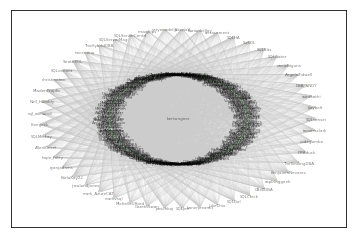

In [269]:
#pos = nx.circular_layout(G2)
#pos["bertwagner"] =[0,0]

# for n in nx.get_node_attributes(G2,'friend_tier').items():
#     if n[1] == 2:
#         pos[n[0]] = [pos[n[0]][0]*3,pos[n[0]][1]*3]

# nx.draw_networkx(G2,pos=pos,node_size=1,node_color="#CCFFCC",alpha=.5,arrowsize=1,font_size=4,width=.1,edge_color="#CCCCCC")

shell_level_1 = []
shell_level_2 = []
for n in nx.get_node_attributes(G2,'friend_tier').items():
    if n[1] == 2:
        shell_level_2.append(n[0])
    else:
        shell_level_1.append(n[0])

shells = [shell_level_1,shell_level_2]
pos = nx.shell_layout(G2,shells,scale=500)
pos["bertwagner"] =[0,0]

nx.draw_networkx(G2,pos=pos,node_size=1,node_color="#333333",alpha=1,arrowsize=1,font_size=2,width=.1,edge_color="#ededed")
# when adding nodes and edges above, populate nodes/edges arrays with colors/alphas?